## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

####  Matplotlib 공식문서 자료
https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html에서 시각화 연습하기


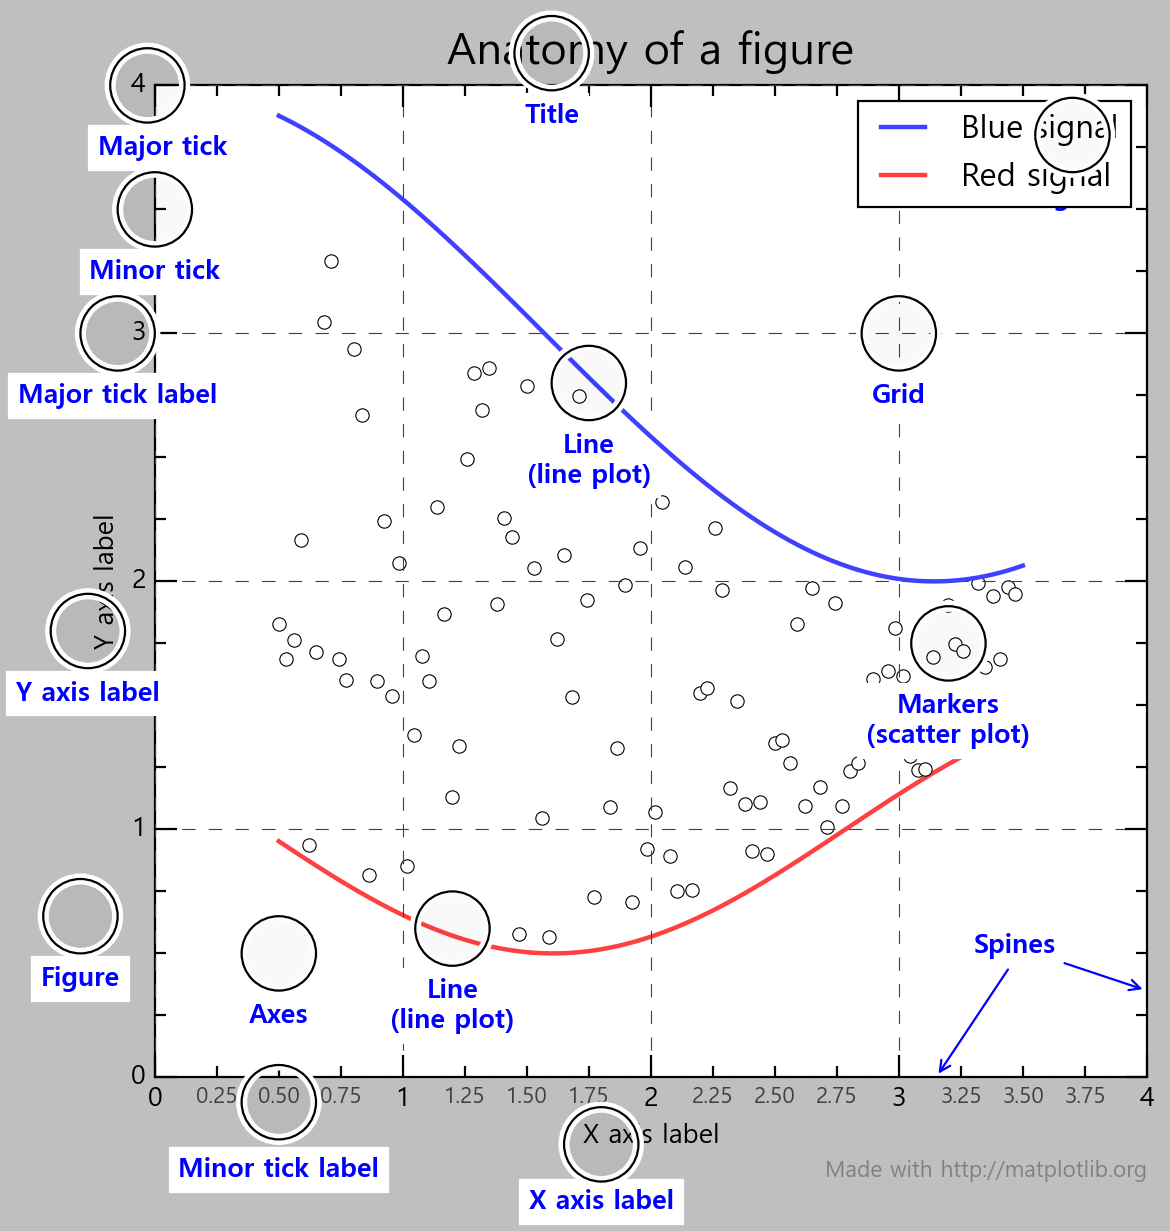

In [21]:
np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()



### 데이터 시각화를 위한 폰트설정

In [22]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [23]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'Malgun Gothic'

<AxesSubplot:title={'center':'한글'}>

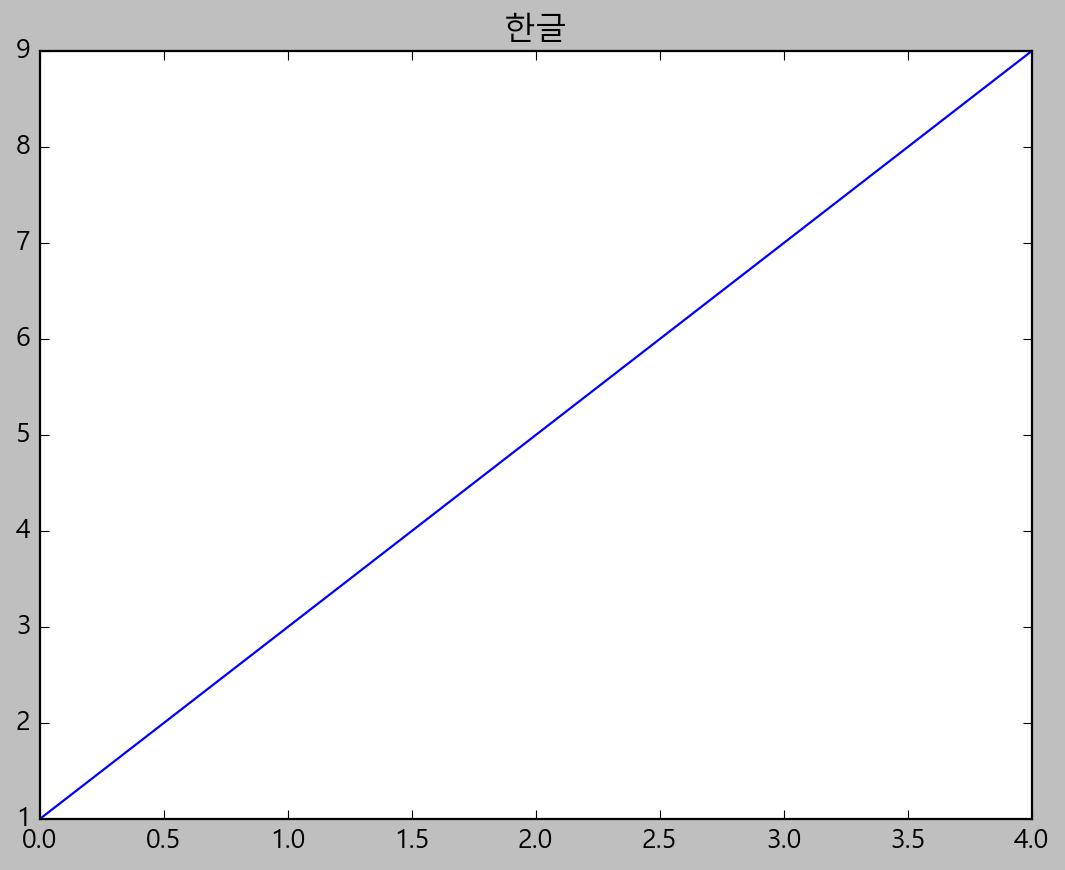

In [24]:
pd.Series([1,3,5,7,9]).plot(title='한글')  #한글 에러 확인

In [25]:
### 그래프 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

<AxesSubplot:title={'center':'한글'}>

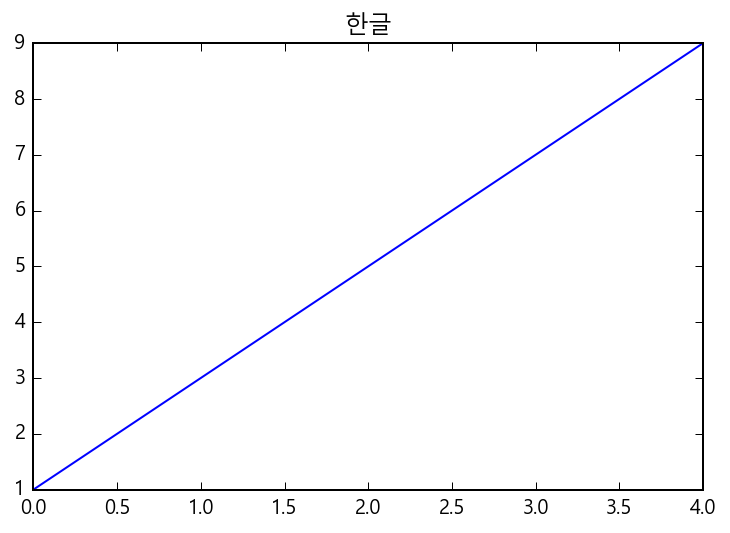

In [26]:
# 한글폰트 확인하기
pd.Series([1,3,5,7,9]).plot(title='한글') 

<AxesSubplot:title={'center':'한글'}>

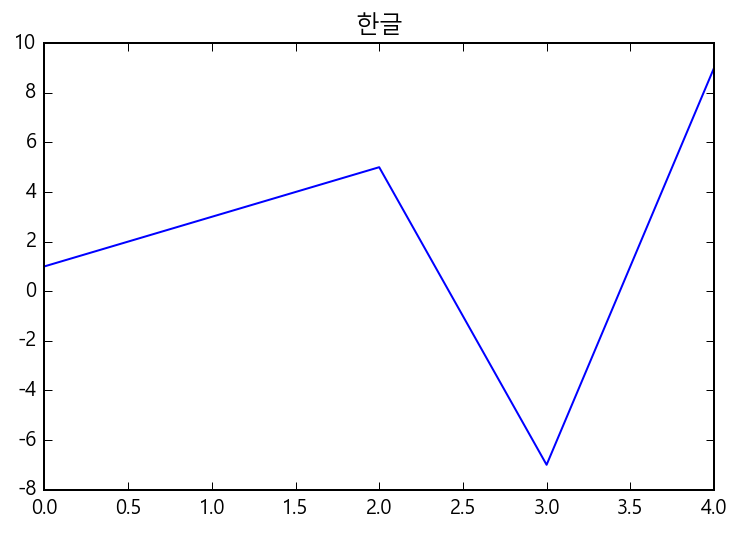

In [27]:
# 만약 중간에 마이너스 값이 들어가면? 폰트가 깨진다. 
pd.Series([1,3,5,-7,9]).plot(title='한글') 

In [28]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [29]:
import matplotlib.pyplot as plt
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.


# ggplot으로 그래프 스타일 설정 >> print(plt.style.available) 
plt.style.use('classic')

# 폰트설정
plt.rc("font", family =get_font_family())

# 마이너스폰트 설정
plt.rc("axes",unicode_minus=False)


# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats   #주피터노트북이 원해 IPython이었음. 현재는 주피터노트북에 탑재되어 있음.
set_matplotlib_formats("retina")  #shift+ tap # retina display를 지원하면, 그래프가 좀 더 선명하게 보인다.

<AxesSubplot:title={'center':'한글'}>

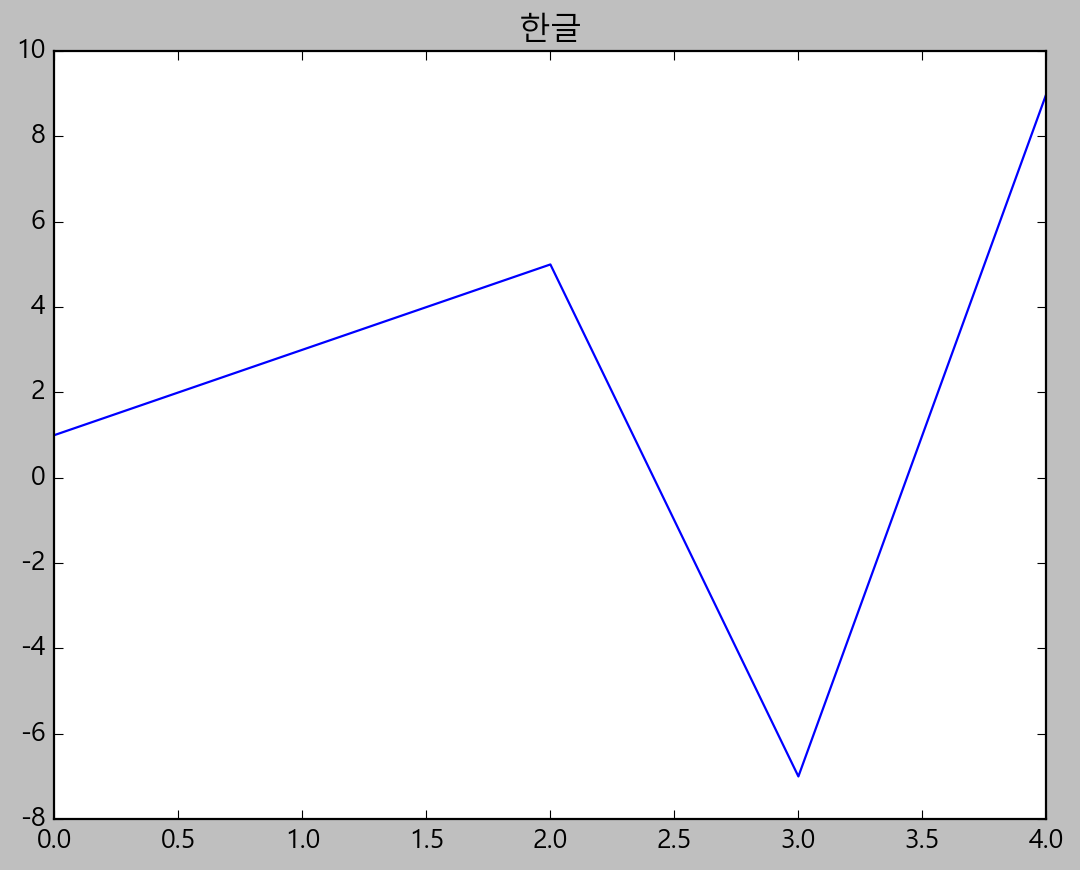

In [30]:
# 폰트 설정 확인하기
pd.Series([1,3,5,-7,9]).plot(title='한글') 

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [31]:
df = pd.read_csv("krx.csv")

In [32]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [33]:
# value_counts()로 빈도수를 구합니다.
df["Market"].value_counts()

KOSPI     5475
KOSDAQ    1528
KONEX      137
Name: Market, dtype: int64

<AxesSubplot:>

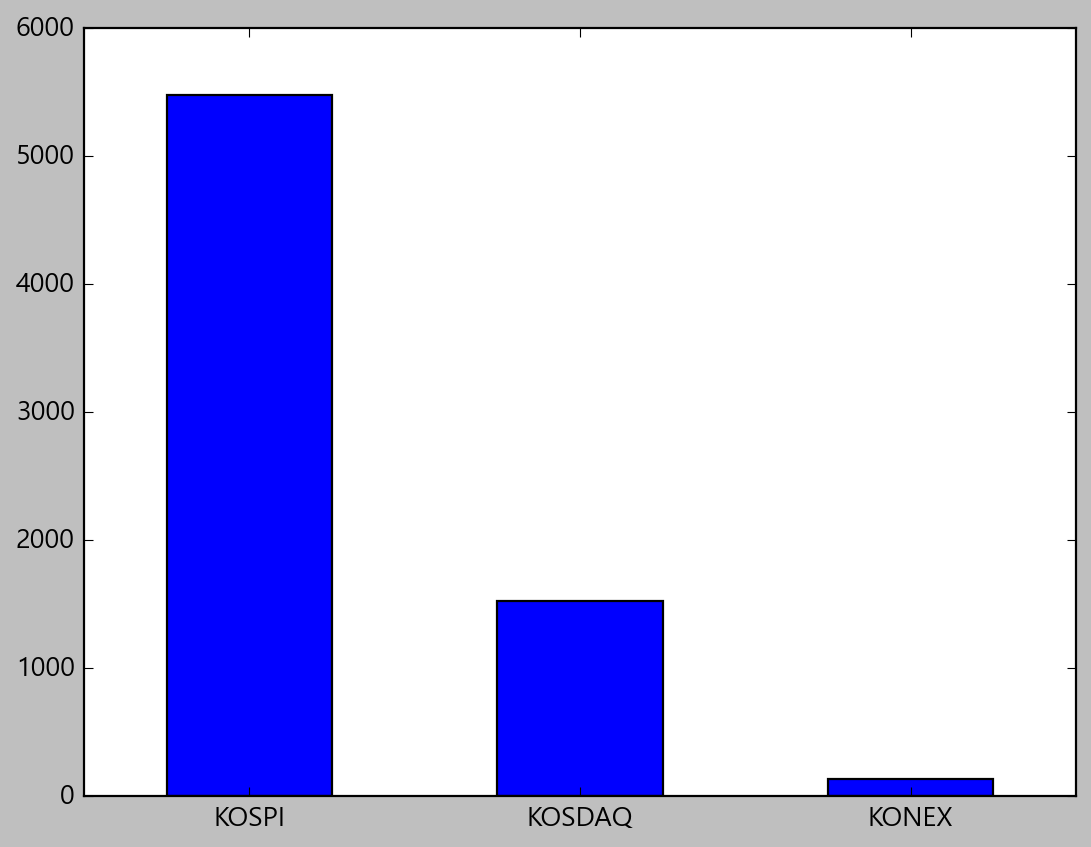

In [34]:
# 빈도수를 시각화 합니다.

# 선그래프
#df["Market"].value_counts().plot()

#범주형이므로 막대로 하는게 더 좋음
df["Market"].value_counts().plot.bar(rot=0) # rot=0: KOSPI, KOSDAQ, KONEX 글씨가 눕히지 앟고 똑바로 하기 위함

<AxesSubplot:xlabel='count', ylabel='Market'>

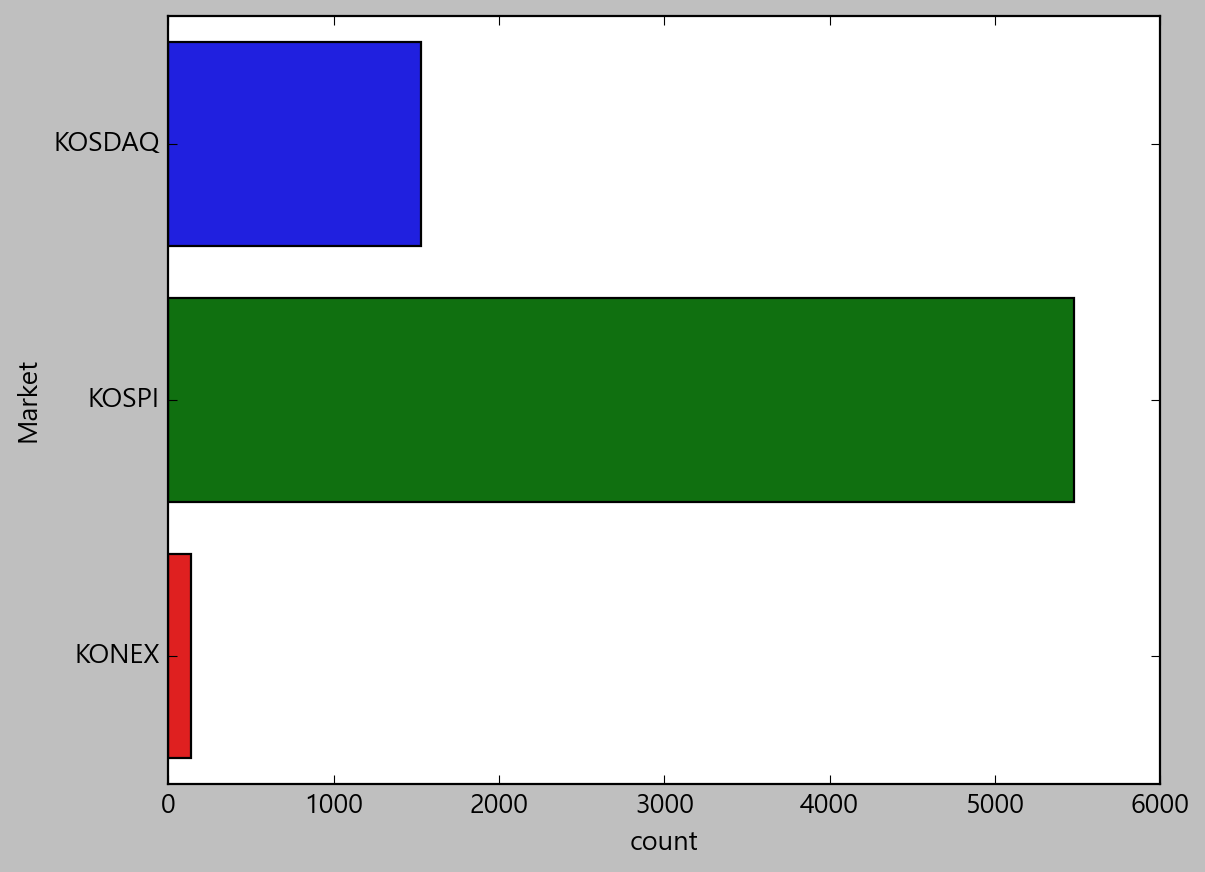

In [35]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df, y='Market') # x = 'Market') # x축에 넣어도 되고, y축에 넣어도 되고
# seaborn의 경우, x축만 가져와도 되고, y축만 가져와도 된다. 

# hue : seaboen에서 다른 변수를 다른 색상으로 표현하기 위한 코드

### Sector

In [36]:
# 섹터의 빈도수를 구합니다.
# df['Sector'].value_counts()

# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
# sector_count_top
sector_count_top = df['Sector'].value_counts().head(30)

In [37]:
sector_count_top

특수 목적용 기계 제조업                            143
소프트웨어 개발 및 공급업                           140
전자부품 제조업                                 125
자동차 신품 부품 제조업                             96
의약품 제조업                                   94
기타 화학제품 제조업                               93
기타 금융업                                    92
금융 지원 서비스업                                75
통신 및 방송 장비 제조업                            71
1차 철강 제조업                                 57
자연과학 및 공학 연구개발업                           57
반도체 제조업                                   57
의료용 기기 제조업                                54
일반 목적용 기계 제조업                             44
플라스틱제품 제조업                                43
기초 화학물질 제조업                               42
기타 전문 도매업                                 39
기초 의약물질 및 생물학적 제제 제조업                     39
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   37
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         34
기타 식품 제조업                                 33
영화, 비디오물, 방송프로그램 제작 및 배급업                 32
의료용품 및 기타 

In [38]:
# df으로 만들어 줘서 좀 더 보기 편하게. 
# 방법1: sector_count_top.to_frame()
# 방법2:
sector_count_top.reset_index()  #index 컬럼명을 표시할 경우

,index,Sector
0,특수 목적용 기계 제조업,143
1,소프트웨어 개발 및 공급업,140
2,전자부품 제조업,125
3,자동차 신품 부품 제조업,96
4,의약품 제조업,94
5,기타 화학제품 제조업,93
6,기타 금융업,92
7,금융 지원 서비스업,75
8,통신 및 방송 장비 제조업,71
9,1차 철강 제조업,57


In [39]:
# df_sector_30
df_sector_30 = sector_count_top.reset_index()

# 컬럼명 변경하기 'index', 'Sector' > 'Sector','count'
df_sector_30.columns = ['Sector','count']
df_sector_30.head(1)

,Sector,count
0,특수 목적용 기계 제조업,143


In [40]:
#'Sector'만 가지고 와서 리스트 형식으로 만든다.
df_sector_30['Sector'].tolist()

['특수 목적용 기계 제조업',
 '소프트웨어 개발 및 공급업',
 '전자부품 제조업',
 '자동차 신품 부품 제조업',
 '의약품 제조업',
 '기타 화학제품 제조업',
 '기타 금융업',
 '금융 지원 서비스업',
 '통신 및 방송 장비 제조업',
 '1차 철강 제조업',
 '자연과학 및 공학 연구개발업',
 '반도체 제조업',
 '의료용 기기 제조업',
 '일반 목적용 기계 제조업',
 '플라스틱제품 제조업',
 '기초 화학물질 제조업',
 '기타 전문 도매업',
 '기초 의약물질 및 생물학적 제제 제조업',
 '컴퓨터 프로그래밍, 시스템 통합 및 관리업',
 '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업',
 '기타 식품 제조업',
 '영화, 비디오물, 방송프로그램 제작 및 배급업',
 '의료용품 및 기타 의약 관련제품 제조업',
 '봉제의복 제조업',
 '기계장비 및 관련 물품 도매업',
 '측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외',
 '기타 금속 가공제품 제조업',
 '건물 건설업',
 '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업',
 '구조용 금속제품, 탱크 및 증기발생기 제조업']

In [41]:
# isin 함수: or연산자를 안써도 되서, 코드가 간결해 진다. 
df['Sector'].isin(df_sector_30['Sector'].tolist())

0        True
1       False
2        True
3        True
4        True
        ...  
7135    False
7136    False
7137    False
7138    False
7139     True
Name: Sector, Length: 7140, dtype: bool

In [42]:
#top_30_list 변수에 넣어주기 
top_30_list = df_sector_30['Sector'].tolist()

In [43]:
df_top_30 = df[df['Sector'].isin(top_30_list)]

<AxesSubplot:xlabel='count', ylabel='Sector'>

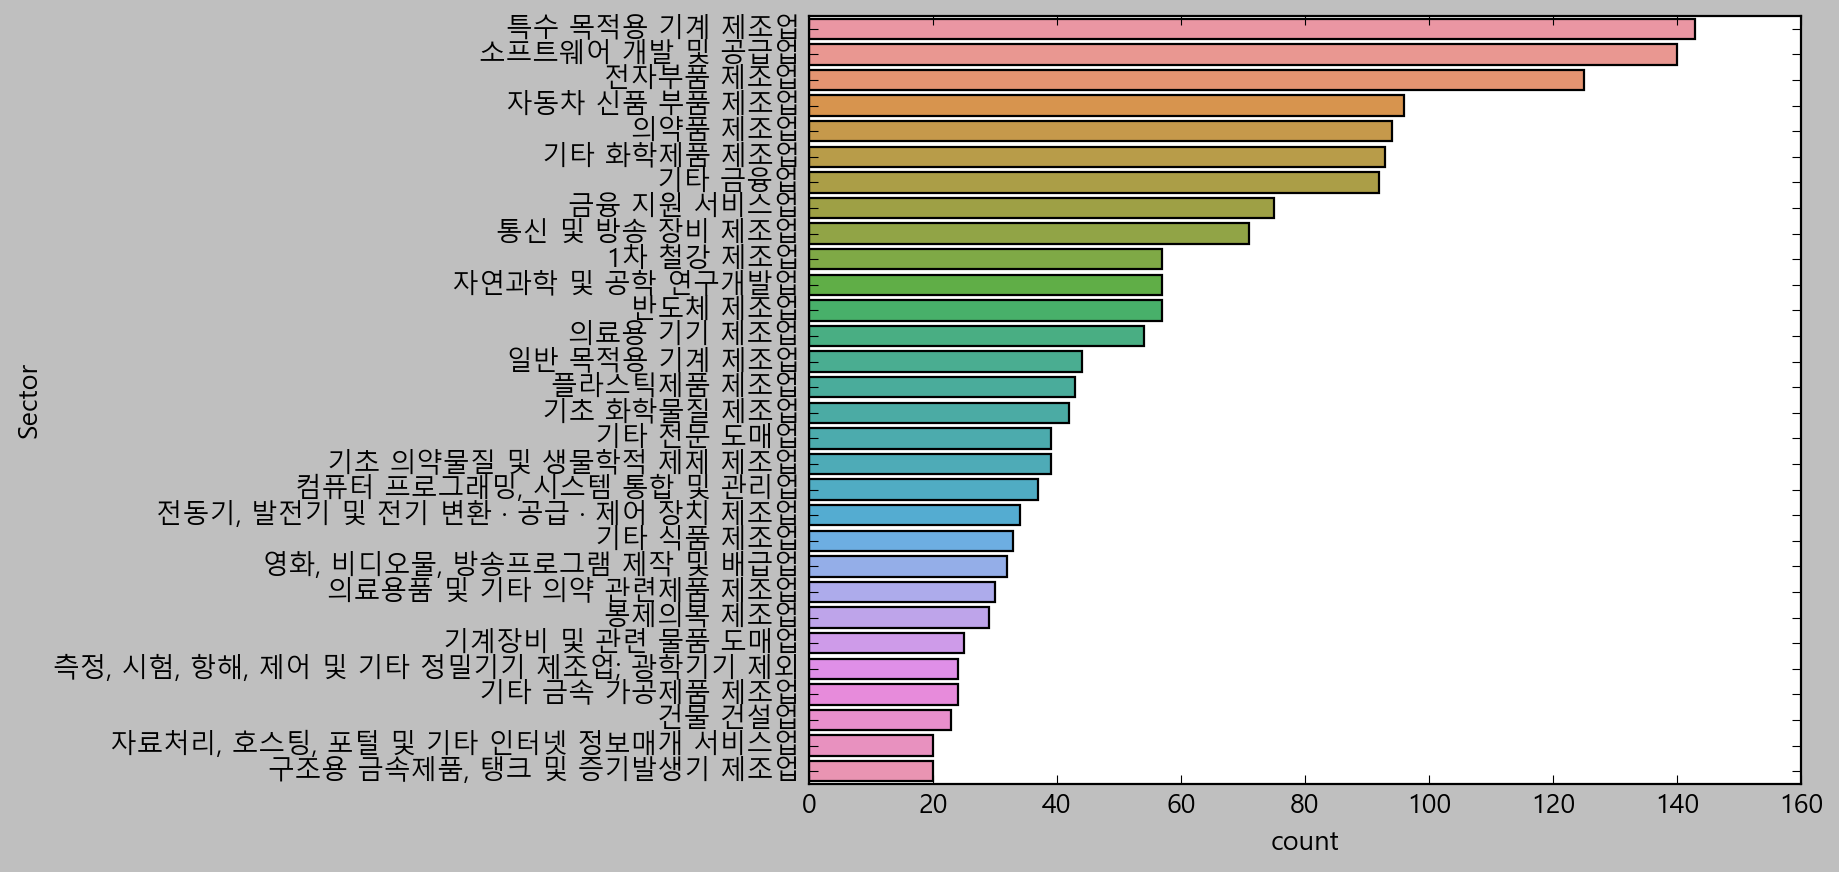

In [44]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data =df_top_30, y="Sector", order=top_30_list)

<AxesSubplot:xlabel='count', ylabel='Sector'>

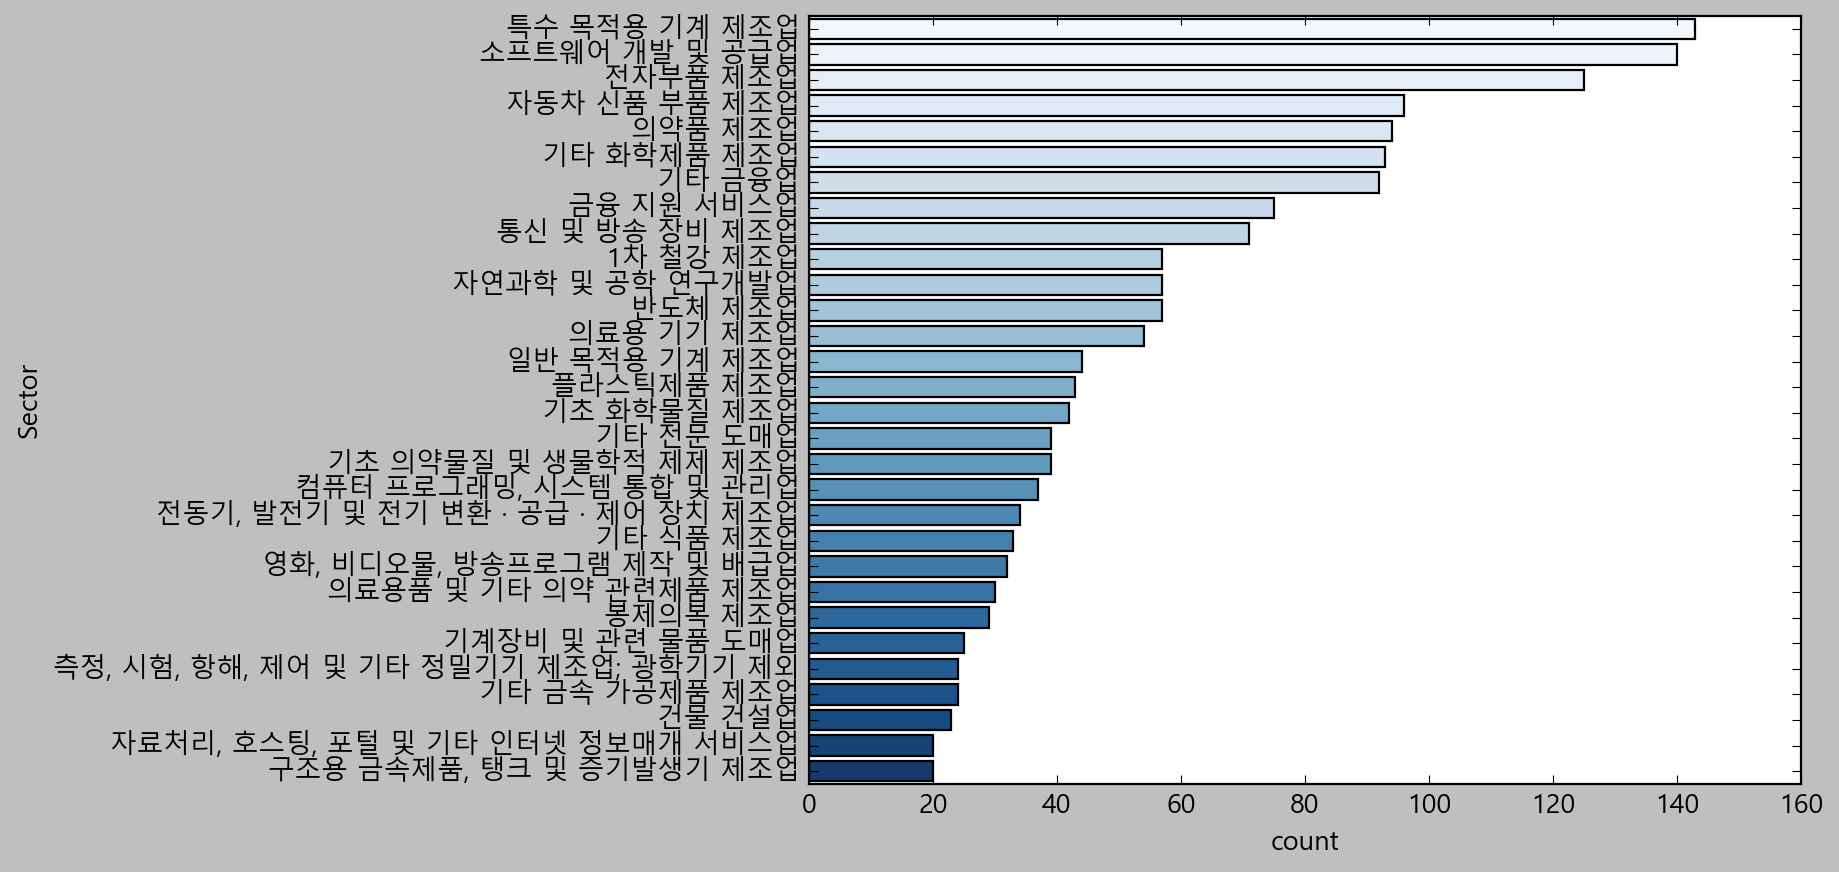

In [45]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data =df_top_30, y="Sector", order=top_30_list, palette="Blues")  # palette="Blue_r"하면 색깔 반대로 

### Industry

<AxesSubplot:>

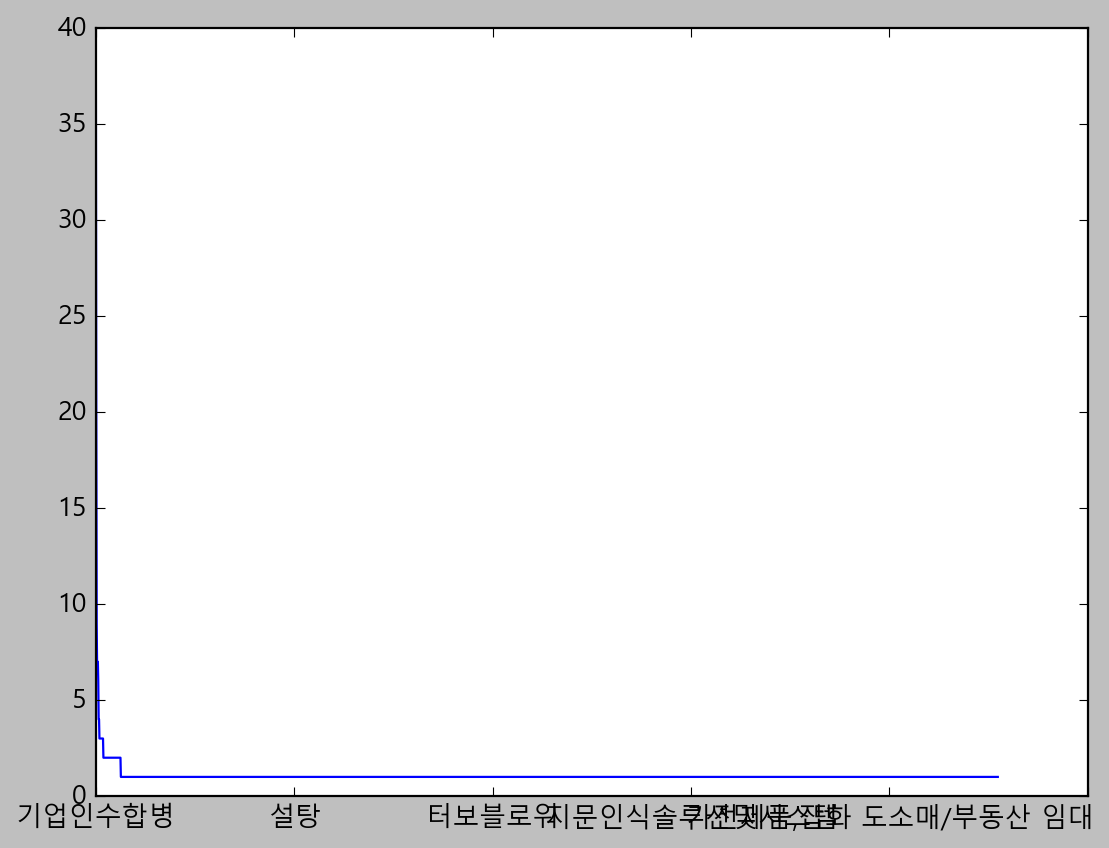

In [56]:
# Industry 의 빈도수를 구합니다.
# industry_top30
df["Industry"].value_counts().plot()


In [57]:
industry_top30 =  df["Industry"].value_counts().head(30)


<AxesSubplot:>

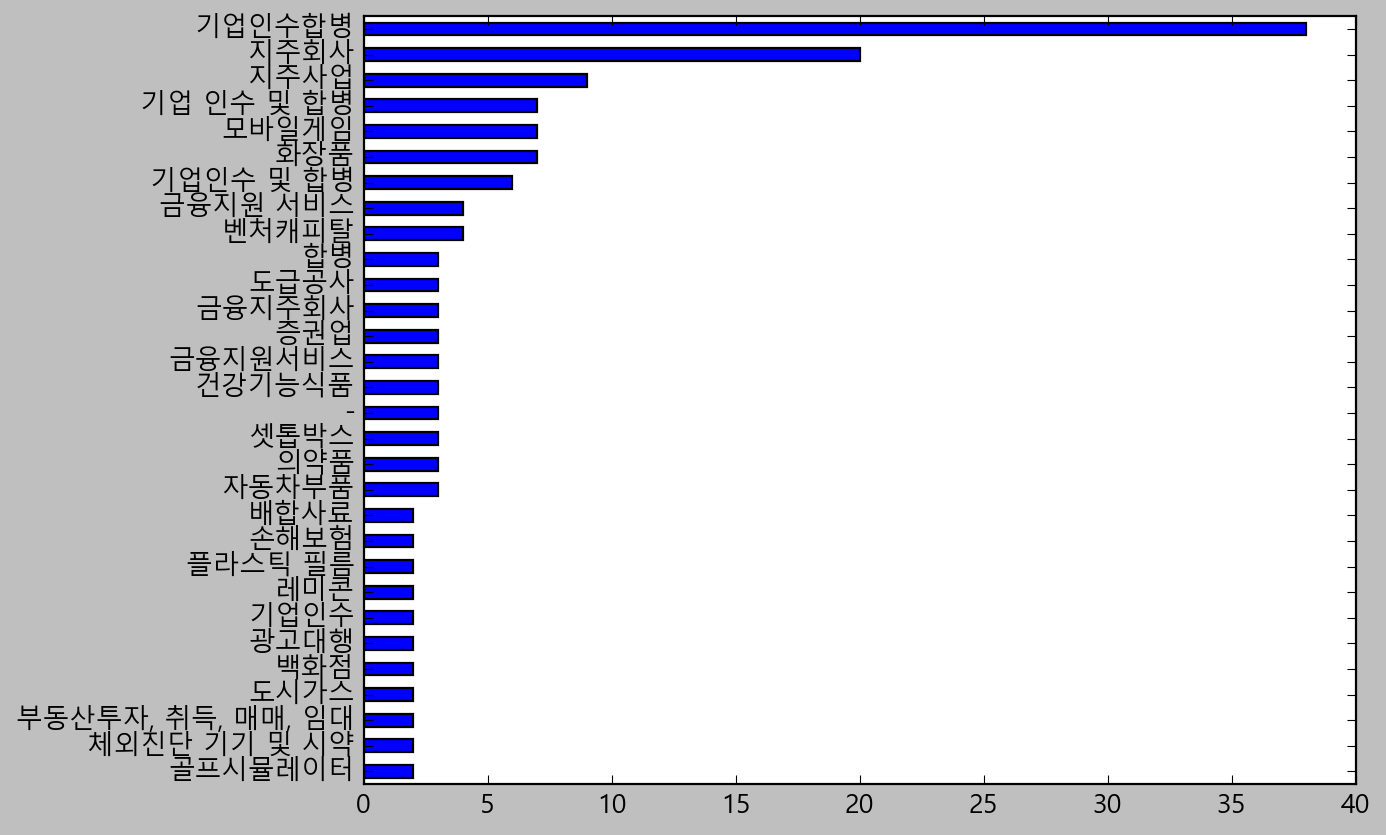

In [58]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.
#industry_top30.plot.barh()   #barh : 가로 
#빈도수가 높은게 위로: sort_values()
industry_top30.sort_values().plot.barh()

In [59]:
 df["Industry"].isin(['기업인수합병','지주회사',''])

0       False
1       False
2       False
3       False
4       False
        ...  
7135    False
7136    False
7137    False
7138    False
7139    False
Name: Industry, Length: 7140, dtype: bool

In [60]:
df[df["Industry"].isin(industry_top30.index)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
46,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
48,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시
52,001040,KOSPI,CJ,기타 금융업,지주회사,1973-06-29,12월,"손경식, 김홍기",http://www.cj.net,서울특별시
63,058820,KOSDAQ,CMG제약,의약품 제조업,의약품,2001-08-31,12월,이주형,http://www.cmgpharma.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7095,126640,KOSDAQ,화신정공,자동차 신품 부품 제조업,자동차부품,2010-08-31,12월,정 서 진,http://hsp.hwashin.co.kr,경상북도
7105,298040,KOSPI,효성중공업,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",-,2018-07-13,12월,김동우/요코타 타케시,http://www.hyosungheavyindustries.com,서울특별시
7108,298000,KOSPI,효성화학,기초 화학물질 제조업,-,2018-07-13,12월,이건종,http://www.hyosungchemical.com,서울특별시
7117,115160,KOSDAQ,휴맥스,영상 및 음향기기 제조업,셋톱박스,2009-11-16,12월,김태훈,NaN,경기도


In [61]:
df_industry_top30 = df[df["Industry"].isin(industry_top30.index)]
df_industry_top30.head(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
46,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시


In [55]:
#seaborn
sns.countplot(data =df_industry_top30, y="Industry", order=top_30_list.index)

TypeError: 'builtin_function_or_method' object is not iterable

### Region 

In [76]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.
df["Region"].value_counts()

서울특별시      991
경기도        687
충청남도        97
경상남도        92
인천광역시       86
충청북도        82
부산광역시       77
경상북도        64
대구광역시       55
대전광역시       52
전라북도        27
강원도         27
울산광역시       25
광주광역시       23
전라남도        22
세종특별자치시     10
제주특별자치도     10
홍콩           8
미국           6
케이맨 제도       5
일본           3
싱가포르         1
Name: Region, dtype: int64

In [77]:
df["Region"]

0       서울특별시
1       서울특별시
2       서울특별시
3         경기도
4         경기도
        ...  
7135      NaN
7136      NaN
7137    서울특별시
7138    서울특별시
7139    인천광역시
Name: Region, Length: 7140, dtype: object

In [82]:
industry_top30 =  df["Region"].value_counts().sum()


<AxesSubplot:xlabel='count', ylabel='Region'>

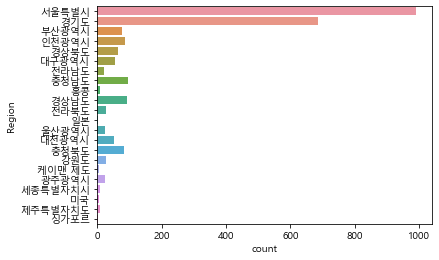

In [81]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다
sns.countplot(data =df, y="Region")  #x 축에 지역이름을 넣으면 너무 좁아서 이름들이 겹침 


<AxesSubplot:xlabel='count', ylabel='Region'>

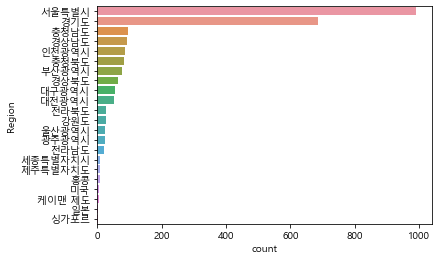

In [85]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.
sns.countplot(data =df, y="Region", order = df["Region"].value_counts().index  )

<AxesSubplot:xlabel='count', ylabel='Region'>

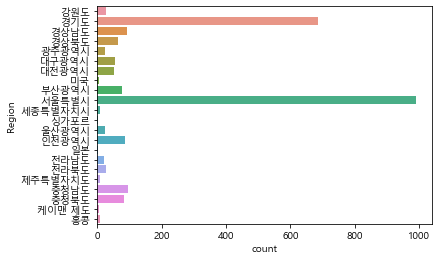

In [88]:
# Region 을 가나다 기준으로 정렬합니다.
sns.countplot(data =df.sort_values("Region"), y="Region")

## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [92]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기
df_market_region = pd.crosstab(df["Market"], df["Region"])
df_market_region


#shif+tab: 참고 단축키

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,35,1,5,5,1,7,0,2,52,...,0,4,0,3,1,1,3,9,0,0
KOSDAQ,16,504,49,40,9,33,37,6,39,527,...,9,57,3,12,15,2,68,59,4,8
KOSPI,4,148,42,19,9,21,8,0,36,412,...,16,25,0,7,11,7,26,14,1,0


<AxesSubplot:ylabel='Region'>

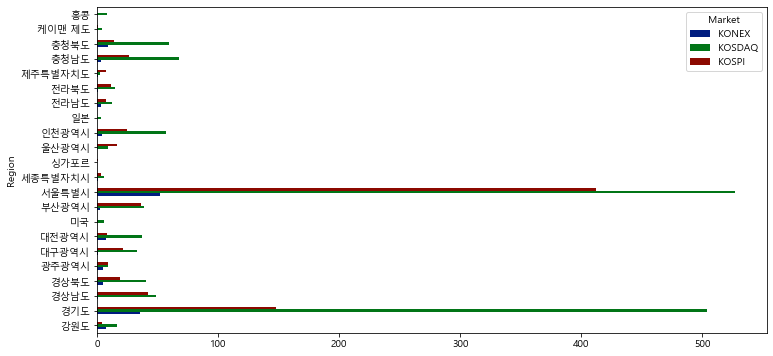

In [95]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기
# T == transpose() == index와 column의 우치를 변경해 줍니다. 
df_market_region.T.plot.barh(figsize=(12,6))  #행과 열의  

### 연도별 상장 종목 빈도수 분석

In [103]:
# Market, ListingYear 빈도수 구하기
df_market_ListingYear = pd.crosstab(df["Market"], df["ListingDate"])
df_market_ListingYear

ListingDate,1956-03-03,1956-07-02,1962-11-01,1964-01-04,1966-03-18,1968-10-21,1968-12-27,1969-05-13,1969-09-08,1969-11-20,...,2021-06-04,2021-06-11,2021-06-17,2021-06-18,2021-06-24,2021-06-25,2021-07-06,2021-07-13,2021-07-16,2021-07-22
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,0,1,2,1,0,1,0,1,0,1
KOSPI,3,2,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='ListingDate', ylabel='count'>

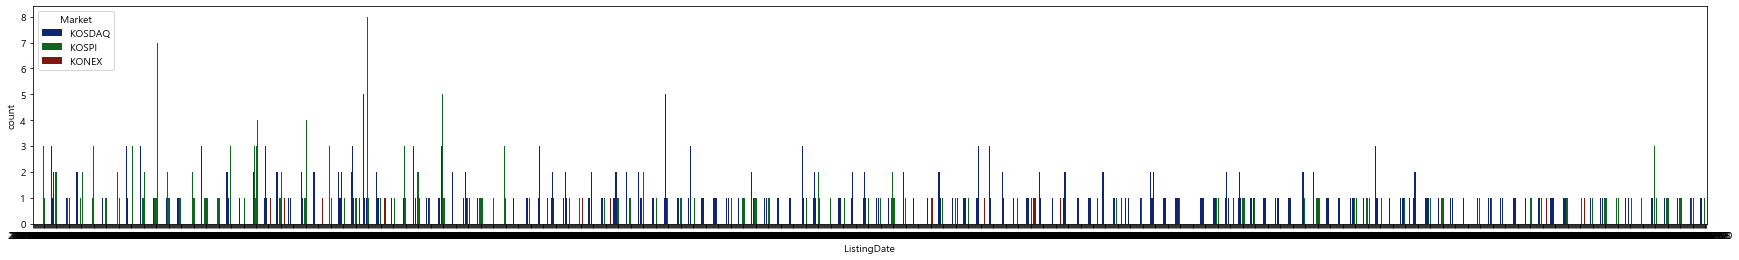

In [104]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다.  hue 옵션을 사용해서 카테고리별 비교가 가능
plt.figure(figsize = (30,4))
sns.countplot(data =df, x="ListingDate", hue="Market")

### Pandas를 통한 시각화

In [105]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.

market_year.T.plot(figsize =(12,4), subplots=True)

NameError: name 'market_year' is not defined

In [ ]:
market_year.columns = market

In [107]:
df['ListingYear'].hist()

KeyError: 'ListingYear'

In [109]:
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7135,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7136,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7137,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7138,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


## 데이터 색인

In [115]:
df["Region"].unique()

array(['서울특별시', '경기도', nan, '부산광역시', '인천광역시', '경상북도', '대구광역시', '전라남도',
       '충청남도', '홍콩', '경상남도', '전라북도', '일본', '울산광역시', '대전광역시', '충청북도',
       '강원도', '케이맨 제도', '광주광역시', '세종특별자치시', '미국', '제주특별자치도', '싱가포르'],
      dtype=object)

In [117]:
# 케이맨 제도에 있는 회사 찾기
df[df["Region"]== '케이맨 제도']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2109,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도
2142,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도
4081,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도
4340,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도
4995,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도


In [121]:
# 1970년 이전에 상장한 기업을 찾습니다.

df[df['ListingYear'] < 1970]

KeyError: 'ListingYear'

In [124]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.

df.loc[(df['ListingYear'] == 2020)  & (df['Region']== '서울특별시') & (df['Market']== KOSPI)]

KeyError: 'ListingYear'

### 지역별 섹터

In [ ]:
#중간에...없이 모든 열의 이름을 보고 싶을 때
# pd.options.display.max_columns = None

In [126]:
# Sector, Region 으로 crosstab 연산을 합니다.
# df_sr

df_sr = pd.crosstab(df["Sector"], df["Region"])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,12,7,1,0,1,0,11,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,1,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


In [129]:
df_sr['경기도']

Sector
1차 비철금속 제조업            7
1차 철강 제조업              4
가구 제조업                 4
가전제품 및 정보통신장비 소매업      0
가정용 기기 제조업             6
                      ..
해상 운송업                 0
해체, 선별 및 원료 재생업        1
화학섬유 제조업               1
환경 정화 및 복원업            0
회사 본부 및 경영 컨설팅 서비스업    2
Name: 경기도, Length: 160, dtype: int64

### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [144]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기
df_sr.loc['소프트웨어 개발 및 공급업']

#많은 순으로 나열 sort_values(ascending=False)
df_sr.loc['소프트웨어 개발 및 공급업'].sort_values(ascending=False) 

Region
서울특별시      95
경기도        37
충청북도        2
일본          2
홍콩          1
경상남도        1
대전광역시       1
부산광역시       1
경상북도        0
광주광역시       0
대구광역시       0
미국          0
세종특별자치시     0
케이맨 제도      0
싱가포르        0
울산광역시       0
인천광역시       0
전라남도        0
전라북도        0
제주특별자치도     0
충청남도        0
강원도         0
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [145]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기
df_sr.loc[['소프트웨어 개발 및 공급업',"금융 지원 서비스업","의약품 제조업"]]  #리스트형태로 되야지만 가져올 수 있다.

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,세종특별자치시,싱가포르,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,37,1,0,0,0,1,0,1,95,0,0,0,0,2,0,0,0,0,2,0,1
금융 지원 서비스업,0,0,0,0,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0,0,0,0
의약품 제조업,5,34,1,0,0,0,2,0,1,39,2,0,0,2,0,0,0,0,2,6,0,0


In [148]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기

df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], '서울특별시']

Sector
소프트웨어 개발 및 공급업    95
금융 지원 서비스업        75
의약품 제조업           39
Name: 서울특별시, dtype: int64

In [149]:
# loc로 여러 행과 열 가져오기


df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], ['서울특별시','경기도','인천광역시']]

Region,서울특별시,경기도,인천광역시
Sector,,,
소프트웨어 개발 및 공급업,95,37,0
금융 지원 서비스업,75,0,0
의약품 제조업,39,34,2


<AxesSubplot:ylabel='Region'>

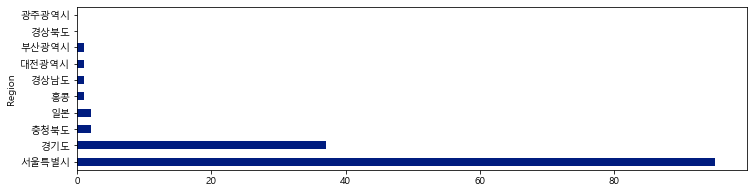

In [150]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.

df_sr.loc["소프트웨어 개발 및 공급업"].sort_values(ascending=False).head(10).plot.barh(figsize =(12,3)) 

<AxesSubplot:ylabel='Region'>

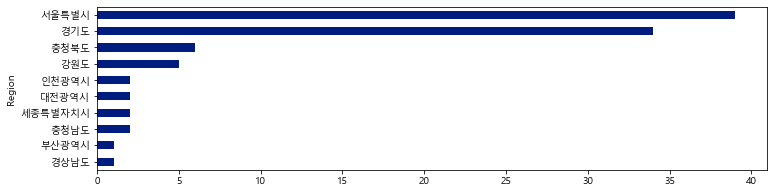

In [153]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.

df_sr.loc["의약품 제조업"].sort_values().tail(10).plot.barh(figsize =(12,3)) 

In [156]:
df.head??

In [154]:
# iloc[행]
# iloc[행,열]
df_sr.iloc[0]

Region
강원도        0
경기도        7
경상남도       1
경상북도       1
광주광역시      0
대구광역시      3
대전광역시      1
미국         0
부산광역시      1
서울특별시      3
세종특별자치시    0
싱가포르       0
울산광역시      0
인천광역시      0
일본         0
전라남도       0
전라북도       0
제주특별자치도    0
충청남도       1
충청북도       0
케이맨 제도     0
홍콩         0
Name: 1차 비철금속 제조업, dtype: int64

In [157]:
import FinanceDataReader as fdr
fdr.StockListing("S&P500")

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie,Health Care,Pharmaceuticals
3,ABMD,Abiomed,Health Care,Health Care Equipment
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary,Restaurants
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
502,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
503,ZION,Zions Bancorp,Financials,Regional Banks
